# Playing Time Influenced by Gender as a Predictor for Game Newsletter Subscription

**Background:** 

Online games increasingly use newsletter subscriptions to enhance user engagement and market new features. Understanding what motivates players to subscribe can help improve marketing and tailor experiences to different player types.

**Question 1 (General):** 

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Interpretation:** 

What is the relationship between total played hours and subscription class of a player? How does a player’s gender strengthen or weaken the predictive ability of average session time for subscription class?

**Dataset Overview**

To answer this question, we will use the players.csv file. The `players` dataset includes 196 observations and 7 variables describing player demographic information. The dataset size is sufficient for meaningful predictive modeling. The variables are given below.

| Variable | Type | Description |
|--------|----|-----------|
| `experience` | character | Player's skill level |
| `subscribe` | logical | Indicates whether player subscribed to a game-related newsletter |
| `hashedEmail` |character | Unique identifier for each player (hashed) |
| `played_hours` | numeric | The total hours the player has played |
| `name` | character | Player's name |
| `gender` | character | Gender |
| `Age` | numeric | Player's age |

Some brief summary statistics of the quantitative variables in the `players` dataset:
|  | `played_hours` | `Age` |
| ---- | ---- | ---- |
| count | 196 | 194 |
| mean | 5.845918 | 20.52062 |
| min | 0 | 8 | 
| max | 223.1 | 50 | 

Some issues in the dataset are listed here:
* There might be some subjective inconsistencies with `experience` if it was self-reported.
* `Age` has 2 missing values.
* `experience` and `gender` should be factor variables.
* Distribution imbalances in variables like `subscribed`, `gender`, and `Age`.

Response variable:
* `subscribe`: Inidcates whether a player is subscribed to a game-related newsletter or not and is what we aim to predict.

Explanatory variables:

* `played hours`: In-game engagement time likely impacts the likelihood of players seeking out more game-information on newsletters.
* `gender`: For simplicity, we use a binary flag where one flag is male and the other is gender-diverse, which is an umbrella term that we will apply here to include women, non-binary people, two-spirit people, agender people, and those who responded 'other' in the survey. We will exclude those who answer 'prefer not to say'. We are interested on the possible effects this variable might have on the predictive capabilities of `played hours` on `subscribe` (If there is any).

To explore the impacts of gender on the predictive ability of `played hours`, we will start by training a classifier including data from all players. `played_hours` will be used as the predictive variable for the binary classification `subscribe` in a standard knn classification scheme. Then, we will split the data into two groups: one comprised of only male players, and one comprised of only gender diverse players. We will train one new classifier on each. This will leave us with three classifiers which we can then directly compare the skill of using standard classification metrics. 

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [4]:
players <- read_csv('https://raw.githubusercontent.com/kathleenramsey/dsci100_group23/main/Project%20Planning%20Players.csv')
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [5]:
players_full <- players |>
    select(subscribe, played_hours, gender) |>
    filter(gender != 'Prefer not to say') |>
    mutate(gender = if_else(gender == "Male", "male", "gender_diverse")) |>
    mutate(subscribe = as.factor(subscribe))

players_male <- players |>
    select(subscribe, played_hours, gender) |>
    filter(gender == 'Male') |>
    mutate(subscribe = as.factor(subscribe))

players_gd <- players |>
    select(subscribe, played_hours, gender) |>
    filter(gender != 'Male', gender != 'Prefer not to say') |>
    mutate(subscribe = as.factor(subscribe))

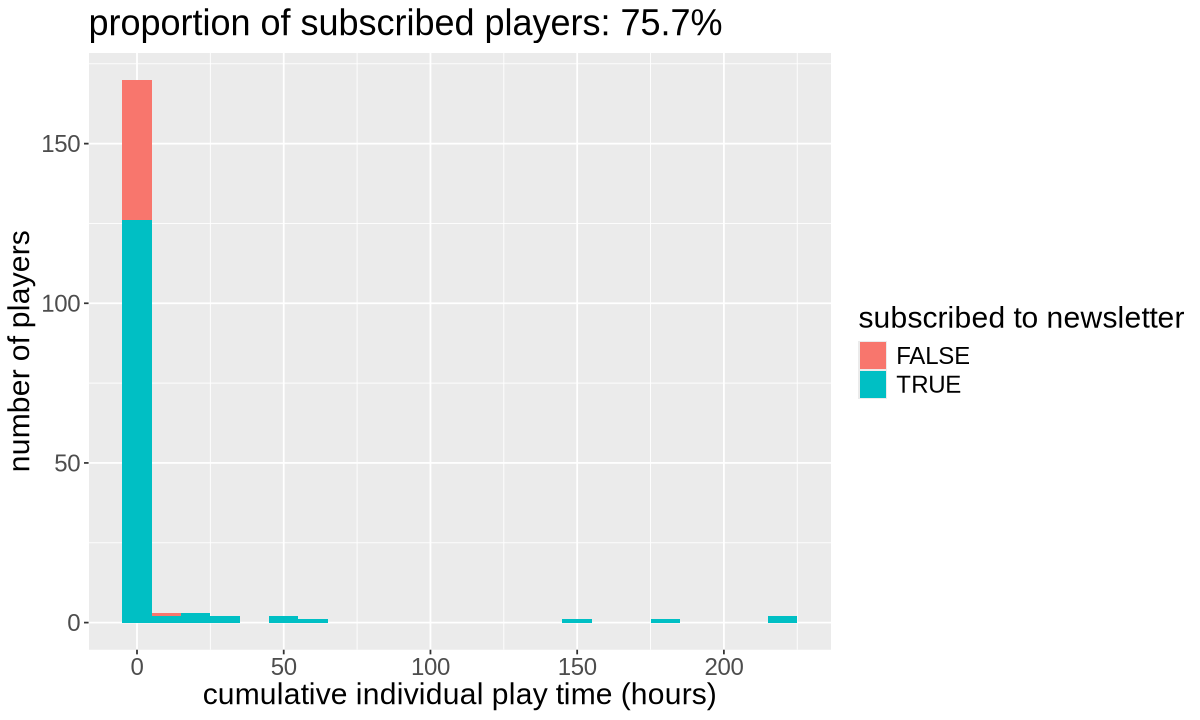

In [6]:
options(repr.plot.height = 6, repr.plot.width = 10)

prop_sub <- players_full |>
  summarise(prop_subscribed = mean(subscribe == TRUE)) |>
    pull()

player_hist <- players_full |>
    ggplot(aes(x=played_hours, fill=subscribe)) +
    geom_histogram(binwidth=10) +
    labs(x='cumulative individual play time (hours)', y='number of players', fill='subscribed to newsletter') +
    theme(text = element_text(size = 18)) +
    ggtitle(paste0("proportion of subscribed players: ", round(prop_sub * 100, 1), '%'))

player_hist

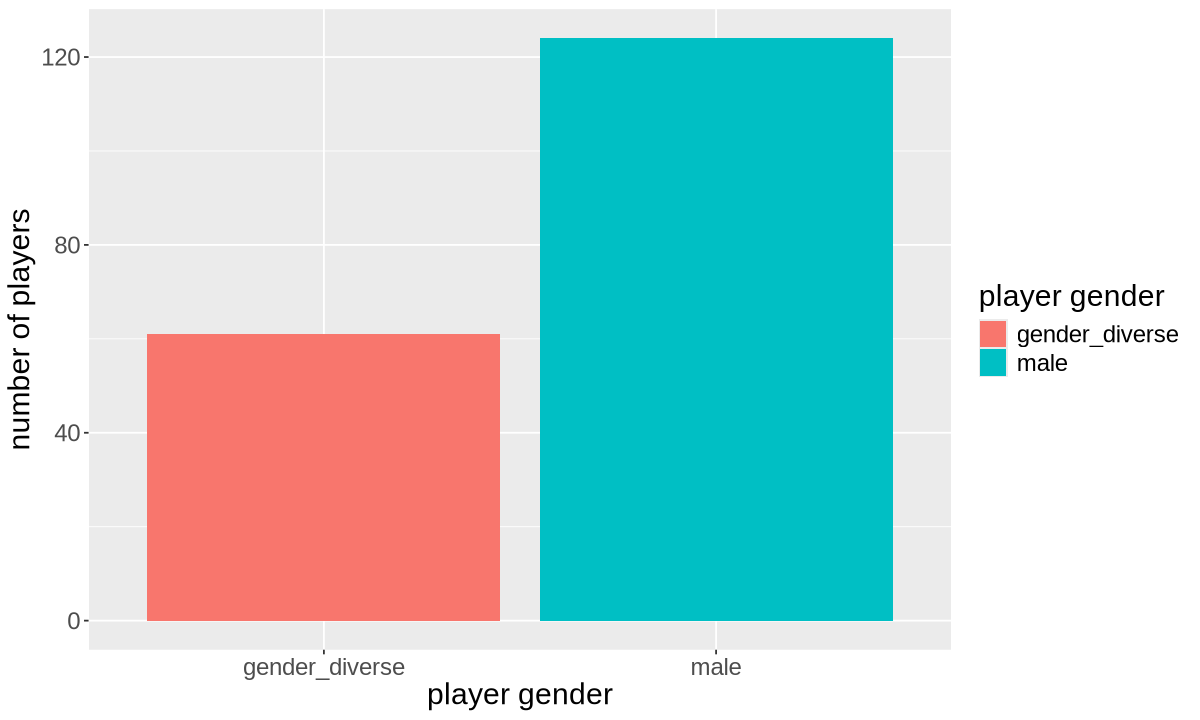

In [7]:
options(repr.plot.height = 6, repr.plot.width = 10)

player_genders <- players_full |>
    ggplot(aes(x=gender, fill=gender)) +
    geom_bar(stat='count') +
    labs(x='player gender', y='number of players', fill='player gender') +
    theme(text = element_text(size = 18)) +
    scale_color_brewer(palette = "Set2")


player_genders

2. Make training/testing splits. Train one classifier on data with all genders, choose optimum k

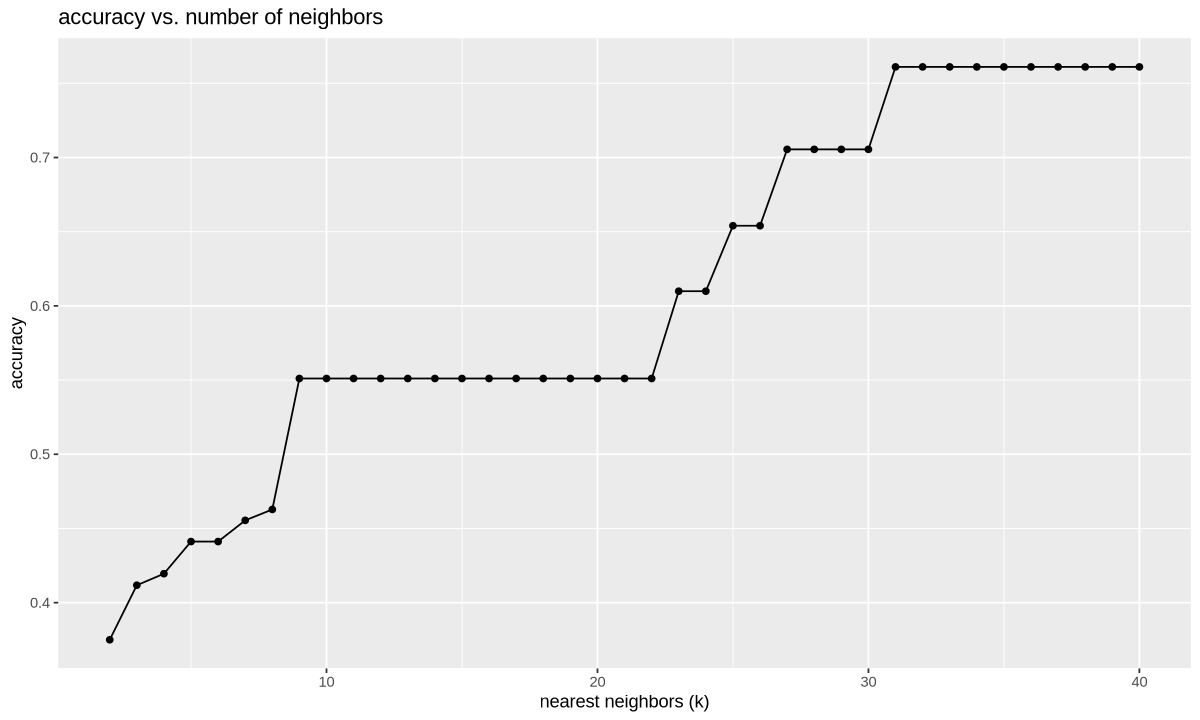

In [8]:
# refer to worksheets/tutorials on classification ???
# use a CV (probably 4-fold) to do training/validation only on the players_full set, not the split sets
# i don't think that the split sets have enough data points to do a good train/test split and still get reliable results from CV
# so if we can find a k value with just the full set we can use that k value for the split sets too.

set.seed(23) 

full_split <- initial_split(players_full, prop = 0.75, strata = subscribe)
full_train <- training(full_split)
full_test <- testing(full_split)

k_vals <- tibble(neighbors = c(2:40))
knn_vfold <- vfold_cv(full_train, v = 4, strata = subscribe)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_recipe <- recipe(subscribe ~ played_hours, data = full_train)

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_tune)

knn_results <- tune_grid(
    knn_workflow,
    resamples = knn_vfold,
    grid = k_vals
)

knn_metrics <- knn_results |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_val_plot <- knn_metrics |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(title = "accuracy vs. number of neighbors",
         x = "nearest neighbors (k)",
         y = "accuracy")

print(cross_val_plot)

3. Using the optimal k found earlier, train classifiers on split data

In [13]:
set.seed(23)

best_k <- 32

knn_model2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")


knn_workflow2 <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model)

knn_fit <- fit(knn_workflow, data = full_train)

Warning message:
“tune samples were requested but there were 138 rows in the data. 133 will be used.”


4. Evaluate classifiers, gather skill metrics, compare and discuss

In [14]:
# this is kind of discussion territory but we can see how the flow of the analysis goes
knn_preds <- predict(knn_fit, new_data = full_test)

knn_results <- bind_cols(knn_preds, full_test)

knn_metrics <- knn_results |>
  metrics(truth = subscribe, estimate = .pred_class)

print(knn_metrics)

# A tibble: 2 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.745
2 kap      binary         0    
